In [1]:
import sys
import os
sys.path.append(os.pardir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from net.TwoLayerNet import TwoLayerNet
from optimizer.Momentum import Momentum
from data import mnist

In [3]:
data_set = mnist.read_data(base_dir='./mnist_data', one_hot=True)

reading ./mnist_data\train-images-idx3-ubyte.gz
reading ./mnist_data\t10k-images-idx3-ubyte.gz
reading ./mnist_data\train-labels-idx1-ubyte.gz
reading ./mnist_data\t10k-labels-idx1-ubyte.gz


In [4]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [5]:
num_iter = 10000
train_size = data_set.train.images.shape[0]
batch_size = 100
iter_per_epoch = max(train_size / batch_size, 1)

train_loss_history = []
train_acc_history = []
test_acc_history = []

In [6]:
optimizer = Momentum(learning_rate=0.01, alpha=0.9)

In [7]:
for i in range(1, num_iter + 1):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = data_set.train.images[batch_mask]
    y_batch = data_set.train.labels[batch_mask]
    
    grads = network.gradient(x_batch, y_batch)
    optimizer.update(network.params, grads)
    
    loss = network.loss(x_batch, y_batch)
    train_loss_history.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(data_set.train.images, data_set.train.labels)
        test_acc = network.accuracy(data_set.test.images, data_set.test.labels)
        print("iter: {}, train_acc = {:.4f}, test_acc = {:.4f}".format(i, train_acc, test_acc))
        train_acc_history.append(train_acc)
        test_acc_history.append(test_acc)

iter: 550, train_acc = 0.8964, test_acc = 0.9012
iter: 1100, train_acc = 0.9181, test_acc = 0.9219
iter: 1650, train_acc = 0.9292, test_acc = 0.9308
iter: 2200, train_acc = 0.9391, test_acc = 0.9385
iter: 2750, train_acc = 0.9465, test_acc = 0.9472
iter: 3300, train_acc = 0.9523, test_acc = 0.9509
iter: 3850, train_acc = 0.9574, test_acc = 0.9536
iter: 4400, train_acc = 0.9606, test_acc = 0.9566
iter: 4950, train_acc = 0.9648, test_acc = 0.9599
iter: 5500, train_acc = 0.9645, test_acc = 0.9593
iter: 6050, train_acc = 0.9696, test_acc = 0.9627
iter: 6600, train_acc = 0.9720, test_acc = 0.9628
iter: 7150, train_acc = 0.9737, test_acc = 0.9648
iter: 7700, train_acc = 0.9745, test_acc = 0.9670
iter: 8250, train_acc = 0.9756, test_acc = 0.9648
iter: 8800, train_acc = 0.9777, test_acc = 0.9665
iter: 9350, train_acc = 0.9788, test_acc = 0.9690
iter: 9900, train_acc = 0.9801, test_acc = 0.9693


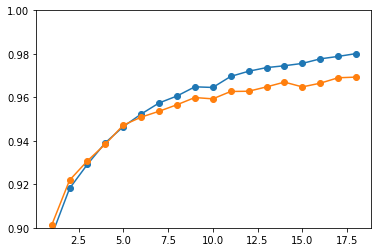

In [8]:
plt.figure()
epochs = range(1, len(train_acc_history) + 1)
plt.plot(epochs, train_acc_history, marker='o')
plt.plot(epochs, test_acc_history, marker='o')
plt.ylim(0.90, 1)
plt.show()